What still needs to be done

Choose the best model (may not be the last one)

In [35]:
from xgboost import XGBClassifier
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings("ignore")


diamonds = sns.load_dataset("diamonds")

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [4]:
# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

Initialize the DATA

In [5]:


from sklearn.model_selection import train_test_split
from sociophysicsDataHandler import SociophysicsDataHandler
import pandas as pd
import matplotlib.pyplot as pl

student_config = True

file_target = 'asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet' 

if student_config:
    dh = SociophysicsDataHandler()
    dh.fetch_prorail_data_from_path(file_target)
else:
    webdav_basepath='/Crowdflow (Projectfolder)/ProRail_USE_LL_data'
    dh = SociophysicsDataHandler(basepath=webdav_basepath)
    
    dh.fetch_prorail_data_from_path(file_target)
                           # ,basepath=webdav_basepath)

print('The available files are the following:')
dh.list_files("econophysics/reddit/")
for path in dh.filelist['path']:
    print(path)

targetPosts = True
stock = 'GME'

if targetPosts:
    filename = 'submissions_wallstreetbets_' + stock + '_start20200901_end20210706.json'
    if stock == 'GME':
        filename = 'submissions_wallstreetbets_GME_start20200901_end20210624.json'
else:
    filename = 'comments_' + stock + '.tar.gz'
    
dh.fetch_econophysics_data_from_path("econophysics/reddit/" + filename)
df = dh.df
# print one of the entries (in this case, the fifth):
df

for col in df.columns:
    print(col)

pd.set_option('display.max_columns', None)
df

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/asdz/platform2.2/20200428/ASDZ_Perron2.2_2020042815_trajectorie.parquet
data fetched. Accessible as <this-object>.df
The available files are the following:
targeting path /storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/
Files listed. Accessible as <this-object>.filelist
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AAPL.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_AMC.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_BBBY.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_FIZZ.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_GME.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_LGND.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_NOKIA.tar.gz
/storage/surfsara/ProRail_USE_LL_data/econophysics/reddit/comments_VIAC.tar.gz
/storage/surfsara/ProRail_USE_LL_

,id,all_awardings,author,author_fullname,created_utc,full_link,gildings,id.1,link_flair_css_class,link_flair_text,num_comments,num_crossposts,over_18,permalink,pinned,retrieved_on,score,selftext,subreddit,subreddit_id,subreddit_subscribers,title,total_awards_received,upvote_ratio,url,created,removed_by_category
0,o72ekv,[],Siphen_,t2_a0s1xfzf,1624546147,https://www.reddit.com/r/wallstreetbets/commen...,{},o72ekv,dd,DD,0,0,False,/r/wallstreetbets/comments/o72ekv/citadel_capi...,False,1624546158,1,If you find where they are hiding taking profi...,wallstreetbets,t5_2th52,10584237,Citadel Capital Replenishment,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624538947,None
1,o72axq,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545829,https://www.reddit.com/r/wallstreetbets/commen...,{},o72axq,meme,Meme,1,0,False,/r/wallstreetbets/comments/o72axq/a_bird_took_...,False,1624545840,1,None,wallstreetbets,t5_2th52,10584217,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/kz3w2tqa78771.jpg,1624538629,moderator
2,o728za,[],Obvious-Amoeba-7158,t2_5kecmdlv,1624545659,https://www.reddit.com/r/wallstreetbets/commen...,{},o728za,news,News,1,0,False,/r/wallstreetbets/comments/o728za/a_bird_took_...,False,1624545671,1,None,wallstreetbets,t5_2th52,10584198,A bird took a shit on my right shoulder. That ...,0,1.0,https://i.redd.it/8mfoeejs68771.jpg,1624538459,moderator
3,o7284r,[],QuantitativEasing,t2_51vqmztv,1624545587,https://www.reddit.com/r/wallstreetbets/commen...,{},o7284r,yolo,YOLO,0,0,False,/r/wallstreetbets/comments/o7284r/been_with_gm...,False,1624545598,1,None,wallstreetbets,t5_2th52,10584191,Been with GME since $6,0,1.0,https://www.reddit.com/gallery/o7284r,1624538387,None
4,o723cs,[],Shlome_Mendlovits,t2_auf64xr4,1624545165,https://www.reddit.com/r/wallstreetbets/commen...,{},o723cs,dd,DD,0,0,False,/r/wallstreetbets/comments/o723cs/pubm_stock_i...,False,1624545177,1,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",wallstreetbets,t5_2th52,10584165,"$PUBM STOCK IS 55% SHORTED, it is the MOST SHO...",0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1624537965,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175412,ikrq8w,[],DeepFuckingValue,t2_49l8qytq,1598990735,https://www.reddit.com/r/wallstreetbets/commen...,{},ikrq8w,yolo,YOLO,93,0,False,/r/wallstreetbets/comments/ikrq8w/gme_yolo_mon...,False,1598990746,1,None,wallstreetbets,t5_2th52,1452992,GME YOLO month-start update — Sep 1 2020,0,1.0,https://i.redd.it/r47cc12lelk51.png,1598983535,None
175413,ikpgw9,[],airdoon,t2_10emmm,1598983707,https://www.reddit.com/r/wallstreetbets/commen...,{},ikpgw9,question,Discussion,41,0,False,/r/wallstreetbets/comments/ikpgw9/gme_short_sq...,False,1598983717,1,This is for all of you who think GME is the ne...,wallstreetbets,t5_2th52,1452670,GME short squeeze,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598976507,None
175414,ikp9ie,[],cyanlce,t2_zaweod7,1598983100,https://www.reddit.com/r/wallstreetbets/commen...,{},ikp9ie,question,Discussion,0,0,False,/r/wallstreetbets/comments/ikp9ie/gme_short_sq...,False,1598983111,1,[removed],wallstreetbets,t5_2th52,1452638,$GME short squeeze to the moon,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598975900,moderator
175415,ikeagj,[],King_Tendie_69,t2_5wcvwhh8,1598936908,https://www.reddit.com/r/wallstreetbets/commen...,{},ikeagj,question,Discussion,1,0,False,/r/wallstreetbets/comments/ikeagj/gme_who_is_w...,False,1598936918,1,[https://www.marketwatch.com/investing/stock/g...,wallstreetbets,t5_2th52,1451373,GME: Who is wielding adamantium gauntlets?,0,1.0,https://www.reddit.com/r/wallstreetbets/commen...,1598929708,None


In [6]:
#Drop all unimportant columns

df.drop(['all_awardings', 'id','author', 'author_fullname','created', 'full_link',  'gildings', 'id.1', 'link_flair_css_class', 'permalink', 'pinned', 'retrieved_on', 'selftext', 'subreddit', 'subreddit_id', 'subreddit_subscribers', 'title', 'url', 'removed_by_category'], axis='columns', inplace= True)
redditPosts = df.set_index('created_utc')
redditPosts.sort_index(inplace=True)
redditPosts.index = pd.to_datetime(redditPosts.index, origin='unix', unit='s')

#Take the mean of all these values over a day
daily_mean_Posts = redditPosts.resample('D').mean()
daily_mean_Posts



,num_comments,num_crossposts,over_18,score,total_awards_received,upvote_ratio
created_utc,,,,,,
2020-09-01,27.000000,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-02,48.333333,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-03,5.000000,0.0,0.000000,1.000000,0.000000,0.996667
2020-09-04,0.666667,0.0,0.000000,1.000000,0.000000,1.000000
2020-09-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-20,24.280000,0.0,0.000000,1.860000,0.060000,0.946400
2021-06-21,1.142857,0.0,0.000000,1.337662,0.025974,0.955974
2021-06-22,0.277778,0.0,0.000000,1.009259,0.000000,0.995278


Get the Daily prices

In [7]:
dh.fetch_econophysics_data_from_path("econophysics/prices/daily_close_prices.csv")
prices = dh.df
prices.index = pd.to_datetime(prices.index) # to be sure that the index is in the pandas DateTime format
prices

trying to fetch: /storage/surfsara/ProRail_USE_LL_data\econophysics/prices/daily_close_prices.csv
data fetched. Accessible as <this-object>.df


,BBBY,NOKIA,AMC,VIAC,FIZZ,GME,AAPL,LGND
2020-09-01,13.040,3.9890,6.07,27.057624,39.111922,7.65,133.522244,101.79
2020-09-02,12.435,3.9960,7.04,27.653478,39.591016,7.71,130.755872,103.22
2020-09-03,11.830,3.8075,6.60,27.594869,38.609342,7.82,120.287441,98.73
2020-09-04,11.750,3.7645,7.02,28.083274,38.064490,7.65,120.367049,99.07
2020-09-07,NaN,3.6415,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-08,28.450,4.5830,47.94,41.460000,45.400000,191.38,143.240000,127.92
2021-07-09,29.600,4.6545,46.19,42.770000,45.100000,191.23,145.110000,129.40
2021-07-12,30.100,4.6220,42.61,43.440000,44.530000,189.25,144.500000,126.36
2021-07-13,29.350,4.9925,39.35,42.580000,44.380000,180.06,145.640000,121.98


In [8]:
#Combine the dfs

combined_df_all_stocks = daily_mean_Posts.join(prices)

ACTUAL MACHINE LEARNING STUFF

In [30]:
#Specify which stock we gon use and add the time back as a column

stock = 'GME'
combined_df = daily_mean_Posts.join(prices[stock]).reset_index()
combined_df.rename(columns={'index': 'created_utc'}, inplace=True)
combined_df.insert(combined_df.shape[1]-1, 'GME', combined_df.pop('GME'))
#Convert time to float
combined_df['created_utc'] = combined_df['created_utc'].apply(lambda x: x.timestamp())

combined_df.dtypes




created_utc              float64
num_comments             float64
num_crossposts           float64
over_18                  float64
score                    float64
total_awards_received    float64
upvote_ratio             float64
GME                      float64
dtype: object

Not my code

>expected=160.7, predicted=157.2
>expected=159.5, predicted=182.1
>expected=161.0, predicted=151.9
>expected=161.1, predicted=156.4
>expected=146.9, predicted=155.0
>expected=144.8, predicted=146.8
>expected=164.5, predicted=146.4
>expected=159.9, predicted=165.7
>expected=180.7, predicted=159.5
>expected=168.8, predicted=170.3
>expected=170.5, predicted=143.5
>expected=176.8, predicted=167.7
>expected=209.4, predicted=174.0
>expected=242.6, predicted=206.8
>expected=254.1, predicted=241.8
>expected=222.0, predicted=252.1
>expected=282.2, predicted=224.2
>expected=258.2, predicted=258.4
>expected=248.4, predicted=258.2
>expected=300.0, predicted=202.4
>expected=302.6, predicted=289.0
>expected=220.4, predicted=295.8
>expected=233.3, predicted=218.9
>expected=222.5, predicted=146.8
>expected=223.0, predicted=223.2
>expected=223.6, predicted=224.8
>expected=213.8, predicted=222.9
>expected=220.4, predicted=236.0
>expected=219.3, predicted=255.5
>expected=212.3, predicted=215.8
MAE: 21.89

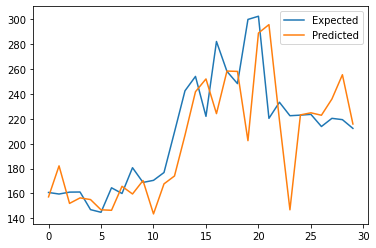

In [47]:
# forecast monthly births with xgboost
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from matplotlib import pyplot

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an xgboost model and make a one step prediction
def xgboost_forecast(train, testX):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict(asarray([testX]))
	return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]
		# fit model on history and make a prediction
		yhat = xgboost_forecast(history, testX)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	return error, test[:, -1], predictions

	

# transform the time series data into supervised learning
data = series_to_supervised(combined_df, n_in=1)
# evaluate
mae, y, yhat = walk_forward_validation(data, 30)
print('MAE: %.3f' % mae)
# plot expected vs preducted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()


Using this fit on new stocks

In [ ]:
#Save the last model
best_model_index = np.argmin(maes)


model.save_model('path/to/your/model.xgb')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 0-1: truncated \UXXXXXXXX escape (<ipython-input-32-80117ee00978>, line 3)